# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import yfinance as yf
%matplotlib inline

# Getting Data

In [27]:
#setting start & end date
end = dt.datetime(2022,1,1)
start = dt.datetime(2016,1,1)

#tickers choosed, MUST BE IN ALPHABETICAL ORDER.
stocks = ['AAPL','AMZN','GOOG','NVDA']

#Getting data from Yahoo Finance
df = yf.Tickers(stocks)
df = df.history(start=start, end=end)['Close']
df.sort_index(inplace=True)
df

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,NVDA
Date,,,,
2016-01-04,24.220577,636.989990,741.840027,7.909822
2016-01-05,23.613625,633.789978,742.580017,8.036890
2016-01-06,23.151512,632.650024,743.619995,7.704565
2016-01-07,22.174416,607.940002,726.390015,7.399120
2016-01-08,22.291666,607.049988,714.469971,7.240287
...,...,...,...,...
2021-12-27,180.100540,3393.389893,2961.280029,309.397308
2021-12-28,179.061859,3413.219971,2928.959961,303.168335
2021-12-29,179.151749,3384.020020,2930.090088,299.958893


In [28]:
# creating percentage returns from daily data
returns = df.pct_change()

# creating mean returns and covariance matrix from daily data
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#setting number of portfolios runs with random weights
num_portfolios = 100000

#set up array to hold results
#increasing the number of arrays to hold the weights values for each stock
results = np.zeros((4+len(stocks)-1, num_portfolios))

for i in range(num_portfolios):
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1 
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #keep the results on the results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio: formulation (return/ volatility) - risk free rate, where risk is zero to this case
    results[2,i] = results[0,i]/results[1,i]
    #iterate through the weight vector and keep data on result array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
        
        
#keep results and convert into DataFrame
results_df = pd.DataFrame(results.T,columns=['Return','Volatility','Sharpe',stocks[0], stocks[1], stocks[2], stocks[3]])

results_df

,Return,Volatility,Sharpe,AAPL,AMZN,GOOG,NVDA
0,0.426338,0.281558,1.514210,0.105312,0.241679,0.345846,0.307163
1,0.298761,0.245400,1.217443,0.174321,0.132698,0.670753,0.022227
2,0.425095,0.275228,1.544518,0.326356,0.254788,0.172090,0.246766
3,0.485002,0.310244,1.563291,0.238048,0.002972,0.325189,0.433790
4,0.319271,0.249085,1.281777,0.077955,0.321573,0.532944,0.067528
...,...,...,...,...,...,...,...
99995,0.337948,0.248766,1.358498,0.233143,0.347252,0.353466,0.066139
99996,0.481740,0.302606,1.591971,0.295493,0.226146,0.095092,0.383269
99997,0.456549,0.291225,1.567686,0.227156,0.224468,0.203177,0.345199
99998,0.472407,0.306721,1.540184,0.076170,0.445341,0.088551,0.389938


In [29]:
#locate the portfolio with highest sharpe
max_sharpe = results_df.iloc[results_df['Sharpe'].idxmax()]
#locate the portfolio with lowest std deviation
min_deviation = results_df.iloc[results_df['Volatility'].idxmin()]


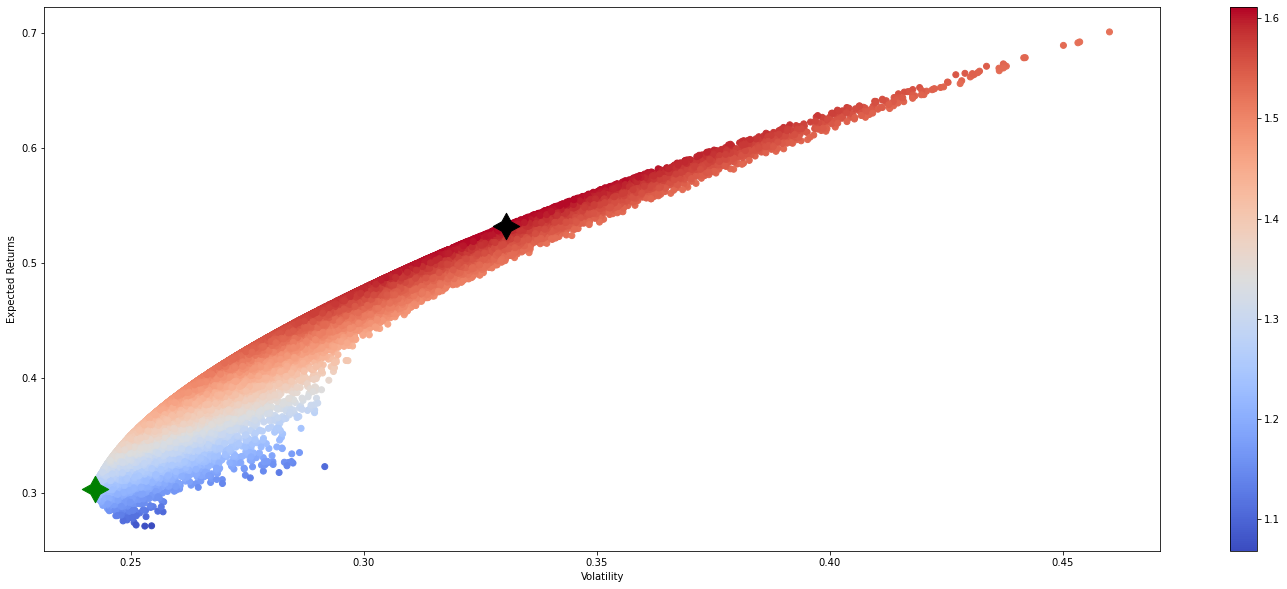

In [30]:
#plotting the efficient frontier 
plt.figure(figsize=(25,10))
plt.scatter(results_df.Volatility, results_df.Return, c=results_df.Sharpe, cmap='coolwarm')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.colorbar()

#plot a mark on the highest sharp ratio
plt.scatter(max_sharpe[1],max_sharpe[0], marker = (4,1,0), color='black', s=700)
#plot a mark on the lowest std deviation portfolio
plt.scatter(min_deviation[1],min_deviation[0], marker = (4,1,0), color='g', s=700)
plt.show()

# Results

In [31]:
#the portfolio with max sharpe ratio
print(max_sharpe)

Return        0.532505
Volatility    0.330526
Sharpe        1.611082
AAPL          0.391765
AMZN          0.121889
GOOG          0.001987
NVDA          0.484359
Name: 86861, dtype: float64


In [32]:
#the portfolio with min standard deviation
print(min_deviation)

Return        0.303788
Volatility    0.242364
Sharpe        1.253434
AAPL          0.252378
AMZN          0.226727
GOOG          0.519463
NVDA          0.001432
Name: 68803, dtype: float64


# Disclaimer

this isn't the best type of strategy to use because not consider some points like costs of transactions, impact of the portfolio size in the market(liquidity) and should analyze more other metrics together.

It's theoretical and not a recomendation.

Past performance is no guarantee of future results.